# FORESEE Models: light scalar H of the Type-I 2HDM 

## Load Libraries 

In [1]:
import sys, os
src_path = "../../"
sys.path.append(src_path)

import numpy as np
from src.foresee import Foresee, Utility, Model
from matplotlib import pyplot as plt
from numba import jit

/Users/abraham/Documents/GitHub/FORESEE/Models/2HDM_H/../../src/foresee.py:1461: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def boostlist(arr_particle, arr_boost):


## 1. Specifying the Model 

In this notebook, we consider a light scalar $H$ of the the type-I 2HDM. Unlike for other types of 2HDMs, in this case the scalar becomes very weakly coupled for large values of $\tan\beta$ and small values of $\cos(\beta-\alpha)$. This has two consequences: i) such particle can avoid existing constrains, and ii) its lifetime can be macroscopic which allows us to probe such particle via long-lived particles searches. 

In the more general case, the phenomenology of the light scalar $H$ can be described by the following Lagrangian

\begin{equation}
 \mathcal{L} =  - m_{H^+}^2 H^+ H^- - \frac{1}{2} m_{H}^2 H^2  -  \sum_f  \frac{s_\alpha}{c_\beta}y_f \ \bar f f  H  - c_{\beta-\alpha} \frac{2m_W}{v} H W^{\mu+} W^-_\mu - c_{\beta-\alpha} \frac{m_Z}{v} H Z^{\mu} Z_\mu - \lambda_{H H^+ H^-} H H^+ H^- - \lambda_{h H H} h H H
\end{equation}

with the Higgs mass $m_{H}$, the mixing parameter $\tan\theta$ and $c_{\beta-\alpha}$ as free parameters. Additionally, we have the tri-linear coupling $\lambda_{H H^+ H^-}$ and $\lambda_{h H H}$, which depend on the masses an coupling parameters of the 2HDM. In particular, the value of $\lambda_{H H^+ H^-}$ has an impact on decay width into di-photons. 

To reduce the dimensionality of the parameter space and to avoid existing constraints, we make a serious of assumptions:
- We us choose $\lambda v^2 = 0$ which avoids the vaccum stability and perturbative unitarity bounds. This implies $\lambda_{H H^{+} H^{-} } = - 2 m_{H^{\pm}}^{2}/v \times c_{\beta-\alpha}$
- We choose $m_A = m_H^+ = 600$ GeV, which avoids bounds from EWPM while remaining allowed with flavour constraints from $b \to s \gamma$. 
- We choose $\cos_{\beta-\alpha}=1/\tan\beta$, which leads to a suppressed SM Higgs decay branching fraction into the light Higgs at high values of $\tan\beta$: ${\rm Br}(h\to HH) = 25/\tan^4\beta$.

In this scenario, the Lagrangian becomes
\begin{equation}
 \mathcal{L} =  - \frac{1}{2} \color{red}{m_{H}}^2 H^2  -  \sum_f \frac{1}{2 \color{red}{\tan^2\beta}} y_f \ \bar f f  H  - \frac{1}{\color{red}{\tan\beta}}\frac{2m_W}{v} H W^{\mu+} W^-_\mu - \frac{1}{\color{red}{\tan\beta}} \frac{m_Z}{v} H Z^{\mu} Z_\mu - \frac{2 m_{H^{\pm}}^{2} }{v \color{red}{\tan\beta}} H H^+ H^- - \frac{m_h^2 }{ 4 v \color{red}{\tan^2\beta}} h H H
\end{equation}

with the light scalar mass $m_H$ and the coupling parameter $\tan\beta$ as the only free parameters. 

In [2]:
energy = "13.6"
modelname = "2HDM_H"
model = Model(modelname)

**Production**  The light Higgs is produced in the FCNC B-meson decays. Let us consider the following interaction Lagrangian 


\begin{equation}
 \mathcal{L}_{H sb}=g_{\phi sb} H \, ( \bar{s}_L b_R + \bar{b}_L s_R) = \xi_{H sb} \frac{m_b}{v} H \, ( \bar{s}_L b_R + \bar{b}_L s_R)  \ . 
\end{equation}

Following the recommendation of the [2309.12793](https://arxiv.org/abs/2309.12793) App. C, the decay branching fraction in the spectator model is

\begin{equation}
BR_{B \rightarrow X_s\phi} = \frac{1}{\Gamma_B}  \frac{(m_B^2-m_\phi^2)^2}{32\pi\,m_B^3}\, |g_{\phi sb}|^2  
\end{equation}


The FCNC coupling is given in Eq 4.21 of [2212.06186](https://arxiv.org/abs/2212.06186) (where we make the substitution $g= \xi \times m_b / v) $: 

\begin{equation}
g_{H s b}=- \frac{m_b}{4\pi^2 v^3} \sum_k V_{ki}^* V_{kj} m_k^2  \left[ g_1(x_k, x_{H^\pm}) \cos(\beta-\alpha)   -g_2(x_k, x_{H^\pm})\sin(\beta-\alpha)-g_0(x_k, x_{H^\pm}) \frac{2v}{m_W^2} \lambda_{H H^+ H^-}   \right]  
\end{equation}

with 

\begin{aligned}
 \frac{2v}{m_W^2} \lambda_{H^{+} H^{-} H}&=-\frac{2}{m_W^2}\left(2 m_{H^{\pm}}^{2}-m_{H}^{2}\right) c_{\beta-\alpha} \approx -\frac{4 m_{H^\pm}^2}{ m_W^2 \tan\beta} = -\frac{4 x_{H^\pm}}{ \tan\beta}  \\
 X_1(x_k, x_{H^\pm})&=-\frac{1}{4}\left\{ \left[\frac{x_{H^\pm}}{x_{H^\pm}-x_k}-\frac{6}{(x_k-1)^2}+3\right]-\frac{x_{H^\pm}(3x_{H^\pm}-2 x_k)}{(x_{H^\pm}-x_k)^2}\log x_{H^\pm}  +\left[\frac{x_{H^\pm}(3x_{H^\pm}-2x_k)}{(x_{H^\pm}-x_k)^2}+\frac{3 (x_k+1)}{(x_k-1)^3}\right]\log x_k\right\}, \\
    X_2(x_k, x_{H^\pm})&=\frac{x_k(5x_{H^\pm}-3x_k)}{4(x_{H^\pm}-x_k)^2}-\frac{x_{H^\pm}x_k(2 x_{H^\pm}-x_k)}{2 (x_{H^\pm}-x_k)^3}\log\frac{x_{H^\pm}}{x_k}, \\
 g_0(x_k, x_{H^\pm}) &=-\cot^2\beta\frac{3x_{H^\pm}^2-4x_{H^\pm}x_k+x_k^2-2x_k(2x_{H^\pm}-x_k)\log\frac{x_{H^\pm}}{x_k}}{16 (x_{H^\pm}-x_k)^3}, \\
 g_1(x_k, x_{H^\pm}) &=-\frac{3}{4}+\cot^2\beta\frac{x_k\left[5x_{H^\pm}^2-8x_{H^\pm}x_k+3x_k^2-2x_{H^\pm}(2x_{H^\pm}-x_k) \log\frac{x_{H^\pm}}{x_k}\right]}{4(x_{H^\pm}-x_k)^3}, \\
 g_2(x_k, x_{H^\pm}) &=\cot\beta X_1(x_k, x_{H^\pm})+\cot^3\beta X_2(x_k, x_{H^\pm}),
\end{aligned}

Using $x_t = m_t^2/m_W^2$ and $x_{H^\pm} = m_{H^\pm}^2/m_W^2$ with $m_H^+=600$ GeV we get

\begin{aligned}
 \frac{2v}{m_W^2} \lambda_{H^{+} H^{-} H}&= -\frac{222.76}{ \tan\beta}  \\
 g_0(x_k, x_{H^\pm}) &=-\frac{0.0027314}{\tan^2\beta}  \\
 g_1(x_k, x_{H^\pm}) &=-\frac{3}{4}- \frac{0.1415}{\tan^2\beta} \\
 g_2(x_k, x_{H^\pm}) &=\frac{1.0386}{\tan\beta} - \frac{0.1415}{\tan^3\beta} 
\end{aligned}

Putting everything together, we get 

\begin{equation}
g_{H s b}= -9.86 \cdot 10^{-6} \times \left[ -\frac{3}{4\tan\beta}- \frac{0.1415}{\tan^3\beta} - \left(\frac{1.0386}{\tan\beta} - \frac{0.1415}{\tan^3\beta}\right)\times \left(1- \frac{1}{\tan^2\beta} \right)^{1/2} - \frac{0.608446664}{\tan^3\beta} \right]  
\end{equation}

and 

\begin{aligned}
BR_{B \rightarrow X_s\phi} & =\left(1 -\frac{m_\phi^2}{m_B^2} \right)^2  \frac{m_B}{\Gamma_B}  \frac{1}{32\pi }\, |g_{\phi sb}|^2  \\
& = 9.6854\cdot 10^{-13} \times \left(1 -\frac{m_\phi^2}{m_B^2} \right)^2  \frac{m_B}{\Gamma_B} \times \left[ -\frac{3}{4\tan\beta}- \frac{0.1415}{\tan^3\beta} - \left(\frac{1.0386}{\tan\beta} - \frac{0.1415}{\tan^3\beta}\right)\times \left(1- \frac{1}{\tan^2\beta} \right)^{1/2} - \frac{0.608446664}{\tan^3\beta} \right]^2
\end{aligned}

**WE SHOULD ALSO VALIDATE THE B>KHH PRODUCTION CHANNEL** **IT LOOKS WRONG. INPUT SHOULD BE dBR/dq2/dcosth, not BR** 

In [3]:
model.add_production_2bodydecay(
    pid0 = "511",
    pid1 = "321",
    br = "9.68544e-13 * self.masses('511')/ self.widths('511') * (1-(mass/self.masses('511'))**2)**2  * (-3/4/coupling -0.1415/coupling**3 - (1.0386/coupling-0.1415/coupling**3)*np.sqrt(1-1/coupling**2)-0.608446664/coupling**3)**2 ",
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 1000,
    scaling = "manual",
)

model.add_production_2bodydecay(
    pid0 = "-511",
    pid1 = "321",
    br = "9.68544e-13 * self.masses('511')/ self.widths('-511') * (1-(mass/self.masses('511'))**2)**2  * (-3/4/coupling -0.1415/coupling**3 - (1.0386/coupling-0.1415/coupling**3)*np.sqrt(1-1/coupling**2)-0.608446664/coupling**3)**2 ",
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 1000,
    scaling = "manual",
)

model.add_production_2bodydecay(
    pid0 = "521",
    pid1 = "321",
    br = "9.68544e-13 * self.masses('521')/ self.widths('521') * (1-(mass/self.masses('521'))**2)**2  * (-3/4/coupling -0.1415/coupling**3 - (1.0386/coupling-0.1415/coupling**3)*np.sqrt(1-1/coupling**2)-0.608446664/coupling**3)**2 ",
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 1000,
    scaling = "manual",
)

model.add_production_2bodydecay(
    pid0 = "-521",
    pid1 = "321",
    br = "9.68544e-13 * self.masses('521')/ self.widths('-521') * (1-(mass/self.masses('521'))**2)**2  * (-3/4/coupling -0.1415/coupling**3 - (1.0386/coupling-0.1415/coupling**3)*np.sqrt(1-1/coupling**2)-0.608446664/coupling**3)**2 ",
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 1000,
    scaling = "manual",
)


model.add_production_3bodydecay(
    label= "511_di_old",
    pid0 = "511",
    pid1 = "321",
    pid2 = "0",
    br = "np.sqrt(1 - 0.22893248780934505*pow(mass,2))*(0.000111856 + 0.0000320094*pow(mass,2) - 2.1983977102660327e-6*pow(mass,4)) + pow(mass,2)*(-0.00007682256830570443 + 8.793590841064129e-6*pow(mass,2) - 5.032846570055706e-7*pow(mass,4))* np.log((2.09*(1 + np.sqrt(1 - 0.22893248780934505*pow(mass,2))))/mass)",
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 1000,
    scaling = 0,
)

model.add_production_3bodydecay(
    label= "-511_di_old",
    pid0 = "-511",
    pid1 = "321",
    pid2 = "0",
    br = "np.sqrt(1 - 0.22893248780934505*pow(mass,2))*(0.000111856 + 0.0000320094*pow(mass,2) - 2.1983977102660327e-6*pow(mass,4)) + pow(mass,2)*(-0.00007682256830570443 + 8.793590841064129e-6*pow(mass,2) - 5.032846570055706e-7*pow(mass,4))* np.log((2.09*(1 + np.sqrt(1 - 0.22893248780934505*pow(mass,2))))/mass)",
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 1000,
    scaling = 0,
)

model.add_production_3bodydecay(
    label= "521_di_old",
    pid0 = "521",
    pid1 = "321",
    pid2 = "0",
    br = "np.sqrt(1 - 0.22893248780934505*pow(mass,2))*(0.000111856 + 0.0000320094*pow(mass,2) - 2.1983977102660327e-6*pow(mass,4)) + pow(mass,2)*(-0.00007682256830570443 + 8.793590841064129e-6*pow(mass,2) - 5.032846570055706e-7*pow(mass,4))* np.log((2.09*(1 + np.sqrt(1 - 0.22893248780934505*pow(mass,2))))/mass)",
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 1000,
    scaling = 0,
)

model.add_production_3bodydecay(
    label= "-521_di_old",
    pid0 = "-521",
    pid1 = "321",
    pid2 = "0",
    br = "np.sqrt(1 - 0.22893248780934505*pow(mass,2))*(0.000111856 + 0.0000320094*pow(mass,2) - 2.1983977102660327e-6*pow(mass,4)) + pow(mass,2)*(-0.00007682256830570443 + 8.793590841064129e-6*pow(mass,2) - 5.032846570055706e-7*pow(mass,4))* np.log((2.09*(1 + np.sqrt(1 - 0.22893248780934505*pow(mass,2))))/mass)",
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 1000,
    scaling = 0,
)

### B>KHH (loop)

**Production**  The light Higgs can also be produced via loop induced flavor changing quark interaction. The corresponding diagrams and formula can be found in Appendix E [here](https://link.springer.com/article/10.1007/JHEP08(2023)001). (the arXiv version does not have this appendix.)

Let us consider the following interaction Lagrangian 
\begin{equation}
 \mathcal{L}_{HHsb}=\xi^{sb}_{HH} \frac{H^2}{v^2}m_{b}\bar{s}P_{R}b + h.c
\end{equation}

The differential BR is given by (multiply eq. E.6 by 0.2 to get dB/dq2/dcosth)

\begin{equation}
 \frac{dBR_{b\rightarrow sHH}}{dq^2dCos(\theta)} = \frac{1}{\Gamma_b} \frac{|\xi^{sb}_{HH}|^2}{128\pi^3v^4m_b}* \left(1-\frac{4*m_H^2}{q^2}\right)^{1/2} \left[\lambda(m^2_b,m^2_s,q^2)\right]^{1/2}*\left[(m_b-m_s)^2-q^2\right]
\end{equation}
Here $\lambda \left(a,b,c\right) = a^2 +  b^2 + c^2 -2(ab + ac + bc)$, from [0902.0160](https://arxiv.org/pdf/0902.0160) and $q^2=(p_b-p_s)^2$. Taking $m_s \rightarrow 0$ we get,

\begin{align}
 \frac{dBR_{b\rightarrow sHH}}{dq^2dCos(\theta)} &= \frac{1}{\Gamma_b} \frac{|\xi^{sb}_{HH}|^2}{128\pi^3v^4m_b}* \left(1-\frac{4*m_H^2}{q^2}\right)^{1/2} *\left(m_b^2-q^2\right)^2 \\
 &= \frac{1}{\Gamma_b} \frac{|\xi^{sb}_{HH}|^2m_b^3}{128\pi^3v^4}* \left(1-\frac{4*m_H^2}{q^2}\right)^{1/2} *\left(1-\frac{q^2}{m_b^2}\right)^2
\end{align}

Expression for $\xi^{sb}_{HH}$ is given by eq. E.2.

\begin{equation}
    \xi^{sb}_{HH} = \frac{g^2}{64\pi^2} \sum_k V^*_{ki}\left[  f_0(x_k,x_{H^{\pm}})  + f_1(x_k,x_{H^{\pm}}) \log{x_k} + f_2(x_k,x_{H^{\pm}}) \log{x_{H^{\pm}}}    \right] V_{kj}
\end{equation}

with

\begin{align}
f_0(x_k,x_{H^{\pm}}) &= -\frac{6x_k^2-x_kx_{H^{\pm}}\left(x_k^2-2x_k+7\right) + 2x^2_{H^{\pm}}\left(x_k-1\right)^2}{\left(x_k-1\right)^2\left(x_{H^{\pm}}-x_k\right)}    \\
f_1(x_k,x_{H^{\pm}}) &= -\frac{3x_k\left(x_k+1\right) - 2x_{H^{\pm}}\left(x_k^3-3x_k^2+6x_k+2\right) + 3x_{H_{\pm}}^2\left(x_k^2-3x_k+4\right)}{\left(x_k-1\right)^3\left(x_{H^{\pm}}-x_k\right)^2} \\
f_2(x_k,x_{H^{\pm}}) &= \frac{x^2_{H^{\pm}}\left(2x_{H^{\pm}}-x_k\right)}{\left(x_{H^{\pm}}-x_k\right)^2}
\end{align}


Here $x_f=\frac{m_f^2}{m_W^2}$, and $x_{H^{\pm}}=\frac{m_{H^{\pm}}^2}{m_W^2}$ and $m_{H^{\pm}}=600$ GeV, $m_b=4.5$ GeV. Summing over $k=t,c,u$ quarks, we get

\begin{align}
\xi^{sb}_{HH} &= 0.000893935
\end{align}

With $v=246$ GeV we get the differential BR as,

\begin{equation}
 \frac{dBR_{b\rightarrow sHH}}{dq^2dCos(\theta)} =  (5.4980)\times10^{-20}*\frac{m_b^3}{\Gamma_b}* \left(1-\frac{4*m_H^2}{q^2}\right)^{1/2} *\left(1-\frac{q^2}{m_b^2}\right)^2
\end{equation}




In [4]:
model.add_production_3bodydecay(
    label= "511_di",
    pid0 = "511",
    pid1 = "321",
    pid2 = "0",
    br = "(5.49809027901328e-20) * ( self.masses('5')**3 / self.widths('511') ) * np.sqrt(1-4*mass**2/q**2) * (1-q**2/self.masses('5')**2)**2",
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 1000,
    scaling = 0,
)

model.add_production_3bodydecay(
    label= "-511_di",
    pid0 = "-511",
    pid1 = "321",
    pid2 = "0",
    br = "(5.49809027901328e-20) * ( self.masses('5')**3 / self.widths('-511') ) * np.sqrt(1-4*mass**2/q**2) * (1-q**2/self.masses('5')**2)**2",
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 1000,
    scaling = 0,
)

model.add_production_3bodydecay(
    label= "521_di",
    pid0 = "521",
    pid1 = "321",
    pid2 = "0",
    br = "(5.49809027901328e-20) * ( self.masses('5')**3 / self.widths('521') ) * np.sqrt(1-4*mass**2/q**2) * (1-q**2/self.masses('5')**2)**2",
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 1000,
    scaling = 0,
)

model.add_production_3bodydecay(
    label= "-521_di",
    pid0 = "-521",
    pid1 = "321",
    pid2 = "0",
    br = "(5.49809027901328e-20) * ( self.masses('5')**3 / self.widths('-521') ) * np.sqrt(1-4*mass**2/q**2) * (1-q**2/self.masses('5')**2)**2",
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 1000,
    scaling = 0,
)

    

B>KHH (tree) (suppressed)

The 3 body decay, $b \rightarrow s H H$ at tree level can be modeled similar to dark higgs pair production in the dark higgs model in [1710.09387](https://arxiv.org/pdf/1710.09387). We follow their Eq. 13.


**Dark Higgs**

Lagrangian

$\mathcal{L}=-m_{\phi}^2 \phi^2 - \sin(\theta)\frac{m_f}{v}\phi\bar{f}f - \lambda v h \phi\phi$, where $h$ is the SM Higgs, and $\phi$ is the dark scalar. The trilinear coupling ($\lambda$) is responsible for the production mode $b \rightarrow s h^* \rightarrow s \phi \phi$, via the off-shell $h$.

( In the 2HDM we have a similar vertex, $\mathcal{L}\supset -\left(\frac{m^2_{h}}{4 v \tan^2\beta}\right)hHH$  which will be responsible for the $HH$ poduction. )

Effective Lagrangian for the $b\rightarrow s \phi\phi$ is

$\mathcal{L} = \frac{1}{2}m_b\left(C\bar{s_L}b_R + C^*\bar{b_L}s_R\right)\phi^2$. (Eq. 11 in [1710.09387](https://arxiv.org/pdf/1710.09387))

This leads to a differential decay width as given by Eq. 13. Here $\lambda \left(a,b,c\right) = a^2 +  b^2 + c^2 -2(ab + ac + bc)$, from [0902.0160](https://arxiv.org/pdf/0902.0160). Since the Higgs boson is a spin-0 particle $\frac{dBR}{dq^2} = 0.5*\frac{dBR}{dq^2d\cos(\theta)}$. Assuming $m_s = 0$ and multiplying by 2 for the two $\phi$ in the final state we get,

$\frac{dBR}{dq^2d\cos(\theta)} = \frac{\left(4.9 * 10^{-8} \mathrm{GeV}^{-2} \lambda\right)^2}{\Gamma_b*256*\pi^3}*m_b^3*\left[1-\frac{4*m_\phi^2}{q^2}\right]^{1/2}\left[1-\frac{q^2}{m_b^2}\right]^2$. This is the expression used in the Dark Higgs FORESEE notebook. 

(Setting $m_b=4.5~\mathrm{GeV, and}~\Gamma_{B^0}=4.3*10^{-13}~\mathrm{GeV}~\mathrm{and}~ \lambda=0.0033$ we get,
$\frac{dBR}{dq^2d\cos(\theta)} = 6.92*10^{-10}*\left[1-\frac{4*m_\phi^2}{q^2}\right]^{1/2}\left[1-\frac{q^2}{m_b^2}\right]^2$.)

**2HDM**

Lets repeat this for 2HDM with the Lagrangian shown previously. The relevant trilinear coupling is $\left(-\frac{m_h^2 }{ 4 v \tan^2\beta} h H H\right)$.

To make the connection between the two models we have, $\left(\frac{m_h^2 }{ 4 v \tan^2\beta}\right) = \lambda v$ or $\lambda = \frac{m_h^2}{4 v^2 \tan^2\beta}$. With $m_h=125.25$ GeV, $v=246$ GeV we have $\lambda = \frac{0.0648}{\tan^2\beta}$. So now we have

$\frac{dBR}{dq^2d\cos(\theta)} = \frac{2.671*10^{-7}}{\tan^4\beta}*\left[1-\frac{4*m_H^2}{q^2}\right]^{1/2}\left[1-\frac{q^2}{m_b^2}\right]^2$.


(or leaving all the SM particle dependenices, $\frac{dBR}{dq^2d\cos(\theta)} = \frac{1.270*10^{-21}}{\tan^4\beta}*\frac{m_b^3}{\Gamma_b}*\left[1-\frac{4*m_H^2}{q^2}\right]^{1/2}\left[1-\frac{q^2}{m_b^2}\right]^2$.)

This depends on the coupling but is suppressed compared to the loop level B>KHH


In [6]:
# ## Add 3 body decay dBR/dq2dCos(theta)

# model.add_production_3bodydecay(
#     label= "511_di_tree",
#     pid0 = "511",
#     pid1 = "321",
#     pid2 = "0",
#     br = "(1.270e-21 / coupling**4) * ( self.masses('5')**3 / self.widths('511') ) * np.sqrt(1-4*mass**2/q**2)*(1-q**2/self.masses('5')**2)**2",
#     generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
#     energy = energy,
#     nsample = 1000,
#     scaling = 0,
# )

# model.add_production_3bodydecay(
#     label= "-511_di_tree",
#     pid0 = "-511",
#     pid1 = "321",
#     pid2 = "0",
#     br = "(1.270e-21 / coupling**4) * ( self.masses('5')**3 / self.widths('-511') ) * np.sqrt(1-4*mass**2/q**2)*(1-q**2/self.masses('5')**2)**2",
#     generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
#     energy = energy,
#     nsample = 1000,
#     scaling = 0,
# )

# model.add_production_3bodydecay(
#     label= "521_di_tree",
#     pid0 = "521",
#     pid1 = "321",
#     pid2 = "0",
#     br = "(1.270e-21 / coupling**4) * ( self.masses('5')**3 / self.widths('521') ) * np.sqrt(1-4*mass**2/q**2)*(1-q**2/self.masses('5')**2)**2",
#     generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
#     energy = energy,
#     nsample = 1000,
#     scaling = 0,
# )

# model.add_production_3bodydecay(
#     label= "-521_di_tree",
#     pid0 = "-521",
#     pid1 = "321",
#     pid2 = "0",
#     br = "(1.270e-21 / coupling**4) * ( self.masses('5')**3 / self.widths('-521') ) * np.sqrt(1-4*mass**2/q**2)*(1-q**2/self.masses('5')**2)**2",
#     generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
#     energy = energy,
#     nsample = 1000,
#     scaling = 0,
# )

**Decay:**  In our 2HDM scalar $H$ scneario, the coupling to fermions scales as $g_{Hff} \sim 1/\tan^3\beta$ while the photon coupling scales as $g_{H\gamma\gamma} \sim 1/\tan\beta$. Therefore the lifetime and branching fractions have a non-trivial scaling behaviour (meaning that $c\tau(g) \neq c\tau(g=1) / g^2$). We therefore need to use the `model.set_ctau_2d()` option. **Check why warning appears** 

In [24]:
model.set_ctau_2d(
    filename="model/ctau.txt",
)

In [25]:
decay_modes = ["e_e", "mu_mu", "ga_ga"]
model.set_br_2d(
    modes=decay_modes,
    finalstates=[[11,-11], [13,-13], [22,22]],
    filenames=["model/br/"+mode+".txt" for mode in decay_modes],
)

We can now initiate FORESEE with the model that we just created. 

In [26]:
foresee = Foresee(path=src_path)
foresee.set_model(model=model)

## 2. Event Generation

In the following, we want to study one specific benchmark point with $m_{H}=1$ GeV and $\tan\beta= 100$ and export events as a HEPMC file. 

In [27]:
mass, coupling, = 1, 100

First, we will produce the corresponding flux for this mass and a reference coupling $\tan\beta_{ref}=1$. 

save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8_m_1.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Max_m_1.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Min_m_1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8_m_1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8-Max_m_1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8-Min_m_1.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8_m_1.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8-Max_m_1.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8-Min_m_1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8_m_1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8-Max_m_1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8-Min_m_1.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_di_old_NLO-P8_m_1.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_di_old_NLO-P8-Max_m_1.npy
save data to file: .

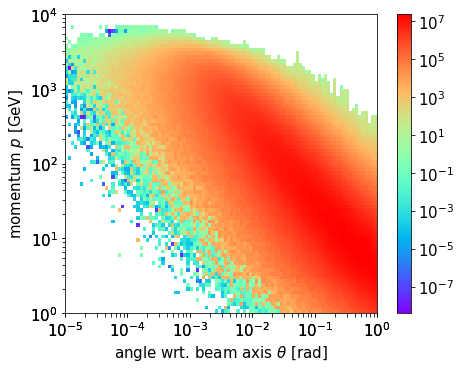

In [28]:
plot=foresee.get_llp_spectrum(mass=mass, coupling=1, do_plot=True)
plot.savefig("Spectrum_"+modelname+".pdf")
plot.show()

Next, let us define the configuration of the detector (in terms of position, size and luminosity). Here we choose FASER during 2022/2023 and require the decay channel $H \to \gamma\gamma$. 

In [29]:
foresee.set_detector(
    distance=474, 
    selection="np.sqrt(x.x**2 + (x.y+0.065)**2)<.1", 
    length=4.0, 
    luminosity=60, 
    channels=["ga_ga"],
)

For our benchmark point, let us now look at how many particle decay inside the decay volume. We also export 1000 unweighted events as a HEPMC file. 

In [30]:
setupnames = ['POWHEG-central', 'POWHEG-max', 'POWHEG-min']
modes = {
    '511':       ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '-511':      ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '521':       ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '-521':      ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '511_di':    ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '-511_di':   ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '521_di':    ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '-521_di':   ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
} 


momenta, weights, _ = foresee.write_events(
    mass = mass, 
    coupling = coupling, 
    energy = energy, 
    numberevent = 1000,
    filename = "model/events/test.hepmc", 
    return_data = True,
    modes=modes,
    weightnames=setupnames,
    nsample=10,
)

for isetup, setup in enumerate(setupnames):
    print("Expected number of events for "+setup+":", round(sum(weights[:,isetup]),3))

Expected number of events for POWHEG-central: 7347.468
Expected number of events for POWHEG-max: 11212.125
Expected number of events for POWHEG-min: 5404.199


Let us plot the resulting energy distribution

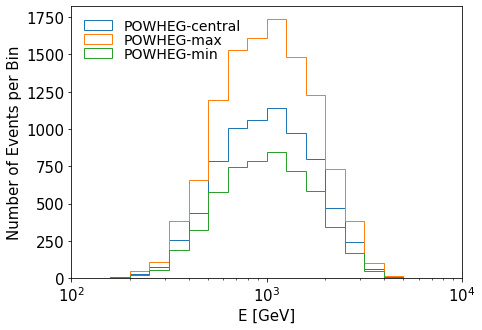

In [32]:
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(1,1,1)
energies = [p.e for p in momenta], 
for isetup, setup in enumerate(setupnames):
    ax.hist(energies, weights=weights[:,isetup], bins=np.logspace(2,4, 20+1), histtype='step', label=setup) 
ax.set_xscale("log")
ax.set_xlim(1e2,1e4) 
ax.set_xlabel("E [GeV]") 
ax.set_ylabel("Number of Events per Bin") 
ax.legend(frameon=False, labelspacing=0, fontsize=14, loc='upper left')
# plt.savefig("E_distribution_"+modelname+".pdf")
plt.show()

## 3. Sensitivity Reach

In the following, we will obtain the projected sensitivity for the LLP model. For this, we first define a grid of couplings and masses, and then produce the corresponding fluxes. 

In [13]:
%%time

masses=[round(x,5) for x in np.logspace(-1,1,20+1)]
couplings = np.logspace(0.01,7.01,141)

for mass in masses: foresee.get_llp_spectrum(mass=mass,coupling=1)

save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Max_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Min_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8-Max_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8-Min_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8-Max_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8-Min_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8-Max_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8-Min_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_di_old_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_di_old_NLO-P8-Max_m_

We can now plot the `production rate vs mass` using the `foresee.plot_production()` function.

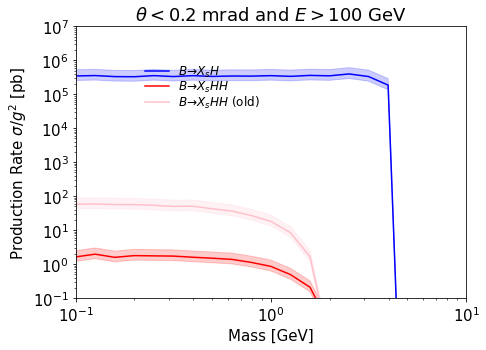

In [33]:
productions=[   
     {"channels": ["511","-511","521","-521"],  "color": "blue", "label": r"$B \to X_s H$", "generators": ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min']},    
    {"channels": ["511_di","-511_di","521_di","-521_di"],  "color": "red", "label": r"$B \to X_s HH$", "generators": ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min']},
    {"channels": ["511_di_old","-511_di_old","521_di_old","-521_di_old"],  "color": "pink", "label": r"$B \to X_s HH$ (old)", "generators": ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min']},
]

plot=foresee.plot_production(
    masses = masses,
    productions = productions,
    energy=energy,
    condition="logth<-3.7 and logp>2",   
    xlims=[0.1,10], ylims=[1e-1,1e7],     
    xlabel=r"Mass [GeV]",
    ylabel=r"Production Rate $\sigma/g^2$ [pb]",
    title=r"$\theta < 0.2$ mrad and $E > 100$ GeV",    
    legendloc=(0.5,0.9),
    fs_label=12,
    ncol=1,
)
# plot.savefig("Production_"+modelname+".pdf")

Let us now scan over various masses and couplings, and record the resulting number of evets. Note that here we again consider the FASER configuration, which we set up before.

In [15]:
%%time

setupnames = ['POWHEG-central', 'POWHEG-max', 'POWHEG-min']
modes = {
    '511':       ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '-511':      ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '521':       ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '-521':      ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],

    # '511_di':    ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    # '-511_di':   ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    # '521_di':    ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    # '-521_di':   ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    
    '511_di_old':    ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '-511_di_old':   ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '521_di_old':    ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '-521_di_old':   ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
} 

#get reach  
list_nevents = {label:[] for label in setupnames}
for mass in masses:
    couplings, _, nevents, _, _  = foresee.get_events(mass=mass, energy=energy, couplings = couplings,modes=modes,nsample=5)
    for i,label in enumerate(setupnames): list_nevents[label].append(nevents.T[i])  
        
#save results
configuration='combined_old'
for label in setupnames: 
    result = np.array([masses,couplings,list_nevents[label]], dtype='object')
    np.save("model/results/"+energy+"TeV_"+configuration+"_"+label+".npy",result)

CPU times: user 35.7 s, sys: 335 ms, total: 36.1 s
Wall time: 36.3 s


In [15]:
%%time

setupnames = ['POWHEG-central', 'POWHEG-max', 'POWHEG-min']
modes = {
    '511':       ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '-511':      ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '521':       ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '-521':      ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],

    '511_di':    ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '-511_di':   ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '521_di':    ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '-521_di':   ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    
    # '511_di_old':    ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    # '-511_di_old':   ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    # '521_di_old':    ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    # '-521_di_old':   ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
} 

#get reach  
list_nevents = {label:[] for label in setupnames}
for mass in masses:
    couplings, _, nevents, _, _  = foresee.get_events(mass=mass, energy=energy, couplings = couplings,modes=modes,nsample=5)
    for i,label in enumerate(setupnames): list_nevents[label].append(nevents.T[i])  
        
#save results
configuration='combined_new'
for label in setupnames: 
    result = np.array([masses,couplings,list_nevents[label]], dtype='object')
    np.save("model/results/"+energy+"TeV_"+configuration+"_"+label+".npy",result)

CPU times: user 35.3 s, sys: 330 ms, total: 35.7 s
Wall time: 35.9 s


Let's also get the reach with just the $B \to K HH$ channel

In [17]:
#reduced modes
modes_red = {
    '511_di_old':       ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '-511_di_old':      ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '521_di_old':       ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '-521_di_old':      ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
} 

#get reach  
list_nevents = {label:[] for label in setupnames}
for mass in masses:
    couplings, _, nevents, _, _  = foresee.get_events(mass=mass, energy=energy, couplings = couplings,modes=modes_red,nsample=5)
    for i,label in enumerate(setupnames): list_nevents[label].append(nevents.T[i])  
        
#save results
configuration='diHiggs_old'
for label in setupnames: 
    result = np.array([masses,couplings,list_nevents[label]], dtype='object')
    np.save("model/results/"+energy+"TeV_"+configuration+"_"+label+".npy",result)

In [16]:
#reduced modes
modes_red = {
    '511_di':       ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '-511_di':      ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '521_di':       ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '-521_di':      ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
} 

#get reach  
list_nevents = {label:[] for label in setupnames}
for mass in masses:
    couplings, _, nevents, _, _  = foresee.get_events(mass=mass, energy=energy, couplings = couplings,modes=modes_red,nsample=5)
    for i,label in enumerate(setupnames): list_nevents[label].append(nevents.T[i])  
        
#save results
configuration='diHiggs_new'
for label in setupnames: 
    result = np.array([masses,couplings,list_nevents[label]], dtype='object')
    np.save("model/results/"+energy+"TeV_"+configuration+"_"+label+".npy",result)

We can now plot the results. For this, we first specify all detector setups for which we want to show result (filename in model/results directory, label, color, linestyle, opacity alpha for filled contours, required number of events).

In [34]:
# setups = [ 
#     ["13.6TeV_default_POWHEG-central.npy", r"$B \to KHH/KH$ (central)", "red"        ,  "solid"  , 0., 3],
#     ["13.6TeV_default_POWHEG-max.npy"    , r"$B \to KHH/KH$ (max)"    , "magenta"    ,  "solid"  , 0., 3],
#     ["13.6TeV_default_POWHEG-min.npy"    , r"$B \to KHH/KH$ (min)"    , "orange"     ,  "solid"  , 0., 3],
#     ["13.6TeV_single_POWHEG-central.npy" , r"$B \to KH$ (central)"    , "dodgerblue" ,  "solid"  , 0., 3],
#     ["13.6TeV_single_POWHEG-max.npy"     , r"$B \to KH$ (max)"        , "blue"       ,  "solid"  , 0., 3],
#     ["13.6TeV_single_POWHEG-min.npy"     , r"$B \to KH$ (min)"        , "deepskyblue",  "solid"  , 0., 3],
# ]


setups = [ 
    ["13.6TeV_combined_new_POWHEG-central.npy", r"$B \to KHH/KH$", "red"        ,  "solid"  , 0., 3],
    ["13.6TeV_combined_old_POWHEG-central.npy", r"$B \to KHH/KH$ (old)", "red"        ,  "dashed"  , 0., 3],

    ["13.6TeV_diHiggs_new_POWHEG-central.npy", r"$B \to KHH$", "blue"        ,  "solid"  , 0., 3],
    ["13.6TeV_diHiggs_old_POWHEG-central.npy", r"$B \to KHH$ (old)", "blue"        ,  "dashed"  , 0., 3],
    
]

Then we specify all the existing bounds (filename in model/bounds directory, label, label position x, label position y, label rotation)  **E949 Bound looks odd**

In [35]:
bounds = [ 
    ["bounds_1508.04094.txt"  , "LHCb $B^0$"  , 0.430, 2.0e1, 1 ],
    ["bounds_SN1987.txt"      , "SN 1987"     , 0.170, 6.0e4, 1 ],
    ["bounds_LEP.txt"         , "LEP"         , 7.430, 1.4e0, 1 ],
    ["bounds_charm.txt"       , "CHARM "      , 0.288, 1.0e3, 90 ],
    ["bounds_E949.txt"        , "E949"        , 0.102, 4.0e3, 90 ],
    ["bounds_NA62.txt"        , "NA62 "       , 0.138, 2.8e3, 90 ],
]

bounds2=[
    ["bounds_kpiHH.txt"       , r"NA62 $K \to \pi HH$"  , 0.200, 2.0e4, 1 ],
]


We also want to show the branching fractions for some of the channels (name of file in model/br directory, color, line style, label, x-position, y-position)  

In [36]:
branchings = [
    ["e_e"       , "red"        , "solid" , r"$ee$"           , 0.110, 0.50],
    ["mu_mu"     , "magenta"    , "solid" , r"$\mu\mu$"       , 0.225, 0.50],
    ["ga_ga"     , "blue"       , "dashed", r"$\gamma\gamma$" , 0.350, 0.50],
]

Finally, we can plot everything using `foresee.plot_reach()`.

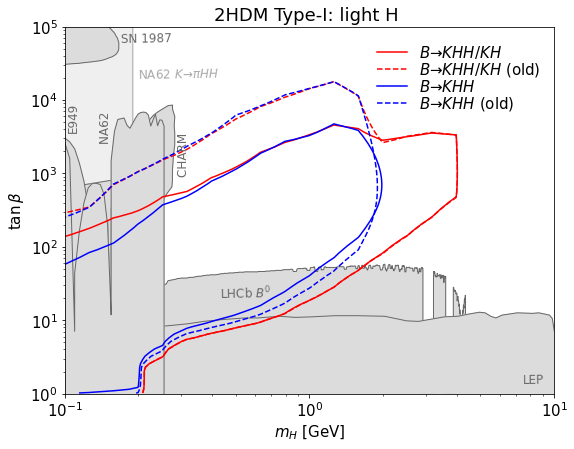

In [37]:
plot = foresee.plot_reach(
    setups=setups,
    bounds=bounds,
    bounds2=bounds2,
    projections=[],
    title="2HDM Type-I: light H ", 
    xlims=[0.1,10], 
    ylims=[1  ,1e5 ],
    xlabel=r"$m_{H}$ [GeV]", 
    ylabel=r"$\tan\beta$",
    legendloc=(1.00,0.99),
    figsize=(8,6),
    fs_label=12,
)

plot.subplots_adjust(left=0.12, right=0.97, bottom=0.10, top=0.95)
# plot.savefig("Reach_"+modelname+".pdf")
plot.show()